<a href="https://colab.research.google.com/github/rugellioliveira/DesafioEngenhariaDados/blob/main/DesafioEngenhariaDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color= yellow> **Preparação do ambiente:**

In [1]:
#Instale as Bibliotecas Necessárias
!pip install pytesseract pillow opencv-python-headless

In [2]:
#Configure tesseract
!pip install opencv-python-headless pillow pytesseract
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,421 kB]
Get:14 http://archive.ubuntu.com/u

In [3]:
# Biblioteca para obter imagem da internet
!pip install requests pillow
!pip install pillow

In [89]:
# Biblioteca para obter dados de PDF
!pip install pdfplumber gdown

In [90]:
# Bibliotecas necessárias para manipulação de imagens
from PIL import Image
import pytesseract

# Bibiliotecas necessárias para manipulaçao de PDF's
import pdfplumber
import gdown

# Bibliotecas necessárias para manipulação dos dados
import cv2
import numpy as np
import pandas as pd
import requests
import sqlite3
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO

#Leitura da imagem e o redimensionamento
def resize_image(image, scale_factor=2):
    height, width = image.shape[:2]
    new_dim = (int(width * scale_factor), int(height * scale_factor))
    resized_image = cv2.resize(image, new_dim, interpolation=cv2.INTER_CUBIC)
    return resized_image

#<font color= yellow> **Pergunta 1:** Encontre todos os usuários que estão ativos por três dias consecutivos, baseado nos dados da imagem 1.

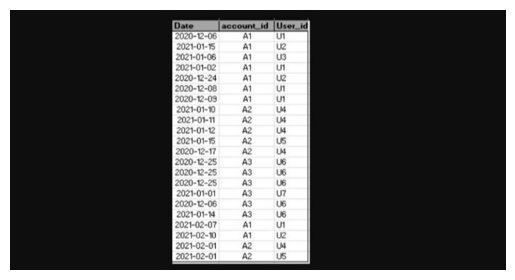

In [6]:
# URL da imagem
image_url = 'https://lh3.googleusercontent.com/d/1wlnEPIb2vLgRQAV4OOaEyKGwEjGqX50Y'

# Carregar a imagem da URL
response = requests.get(image_url)
image_bytes = BytesIO(response.content)
image = cv2.imdecode(np.frombuffer(image_bytes.read(), np.uint8), cv2.IMREAD_COLOR)

# Converter de BGR (OpenCV) para RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem
resized_image = resize_image(image_rgb, scale_factor=2)

# Exibir a imagem redimensionada
plt.imshow(resized_image)
plt.axis('off')
plt.show()

In [7]:
# Dados coletados da imagem
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(resized_image, config=custom_config)
print(text)

[Date _| account_id |User_id
2020-12-06 Al ui
2021-01-15 Al U2
2021-01-06 Al U3
2021-01-02 Al ui
2020-12-24 Al U2
2020-12-08 Al ul
2020-12-09 Al ul
2021-01-10 A2 U4
2021-01-11 A2 ud
2021-01-12 A2 Ud
2021-01-15 A2 US
2020-12-17 A2 ud
2020-12-25 A3 U6
2020-12-25 A3 U6
2020-12-25 A3 U6
2021-01-01 A3 u?
2020-12-06 A3 U6
2021-01-14 A3 U6
2021-02-07 Al ul
2021-02-10 Al u2
2021-02-01 A2 ud
2021-02-01 A2 us



In [8]:
# Limpeza do texto
cleaned_text = text.replace("_|", "").replace("|", "").replace("[", "").strip()

# Usar StringIO para converter o texto limpo em um DataFrame
data = StringIO(cleaned_text)
df1 = pd.read_csv(data, sep='\s+', engine='python')

# Corrigir inconsistências comuns
df1['account_id'] = df1['account_id'].str.strip().replace({'Al': 'A1'})
df1['User_id'] = df1['User_id'].str.strip().replace({'ul': 'U1', 'ui': 'U1', 'u2': 'U2', 'ud': 'U4', 'Ud': 'U4', 'us': 'U5', 'US': 'U5', 'u?': 'U7'})
df1

,Date,account_id,User_id
0,2020-12-06,A1,U1
1,2021-01-15,A1,U2
2,2021-01-06,A1,U3
3,2021-01-02,A1,U1
4,2020-12-24,A1,U2
5,2020-12-08,A1,U1
6,2020-12-09,A1,U1
7,2021-01-10,A2,U4
8,2021-01-11,A2,U4
9,2021-01-12,A2,U4


In [9]:
# Converte a coluna 'Date' para datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Ordena o DataFrame por 'User_id' e 'Date'
df1 = df1.sort_values(by=['User_id', 'Date'])

# Exibe DataFrame reorganizado
df1

,Date,account_id,User_id
0,2020-12-06,A1,U1
5,2020-12-08,A1,U1
6,2020-12-09,A1,U1
3,2021-01-02,A1,U1
18,2021-02-07,A1,U1
4,2020-12-24,A1,U2
1,2021-01-15,A1,U2
19,2021-02-10,A1,U2
2,2021-01-06,A1,U3
11,2020-12-17,A2,U4


In [10]:
# Função para verificar se há três dias consecutivos
def check_consecutive_dates(dates):
    # Ordena datas em ordem crescente
    sorted_dates = sorted(dates)
    # Garante que há pelo menos três datas a serem comparadas
    for i in range(len(sorted_dates) - 2):
        if (sorted_dates[i + 1] - sorted_dates[i]).days == 1 and (sorted_dates[i + 2] - sorted_dates[i + 1]).days == 1:
            return True
    return False

# Lista para armazenar usuários que estão ativos por três dias consecutivos.
active_users = []

# Encontrar os usuários com três dias consecutivos
for user_id, group in df1.groupby('User_id'):
    if check_consecutive_dates(group['Date']):
        active_users.append(user_id)

print("Usuários ativos por três dias consecutivos:", active_users)

Usuários ativos por três dias consecutivos: ['U4']


#<font color= yellow> **Pergunta 2:** Buscar o cargo que tem os salários mais altos na companhia, baseando-se nas duas tabelas de dados da imagem 2.

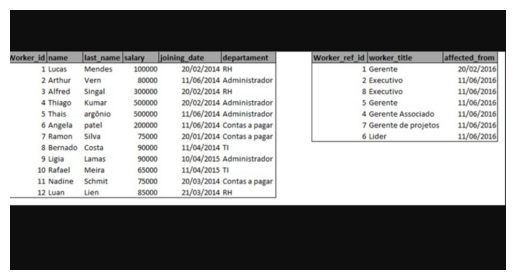

In [11]:
# URL da imagem
image_url2 = 'https://lh3.googleusercontent.com/d/1b-sdd8RzhEU8_XLAIL0xNfnmKGq6ZHrY'

# Carregar a imagem da URL
response2= requests.get(image_url2)
image_bytes2 = BytesIO(response2.content)
image2 = cv2.imdecode(np.frombuffer(image_bytes2.read(), np.uint8), cv2.IMREAD_COLOR)

# Converter de BGR (OpenCV) para RGB (Matplotlib)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem
resized_image2 = resize_image(image_rgb2, scale_factor=2)

# Exibir a imagem redimensionada
plt.imshow(resized_image2)
plt.axis('off')
plt.show()

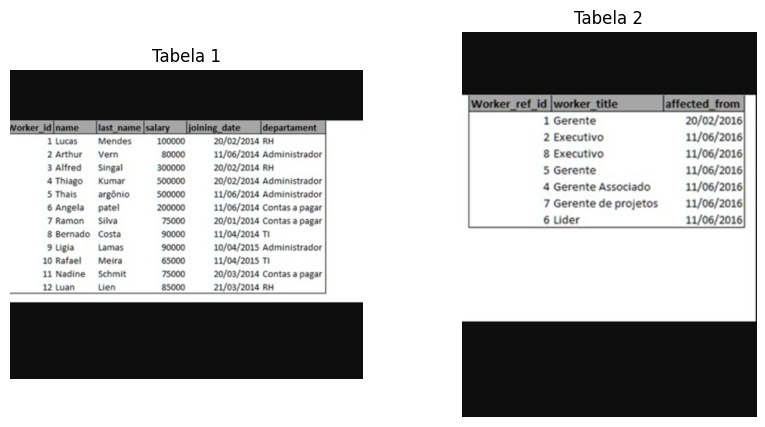

In [12]:
height, width, _ = image2.shape

# Calcular a largura da primeira e segunda partes da imagem (definir proporção)
width_table1 = int(width * 0.6)
width_table2 = int(width * 0.4)

# Dividir a imagem em duas partes verticais
table1_image = image2[:, :width_table1]
table2_image = image2[:, width_table1:]

# Converter de BGR (OpenCV) para RGB (Matplotlib)
image_rgb_table1 = cv2.cvtColor(table1_image, cv2.COLOR_BGR2RGB)
image_rgb_table2 = cv2.cvtColor(table2_image, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem
resized_image_table1 = resize_image(image_rgb_table1, scale_factor=2)
resized_image_table2 = resize_image(image_rgb_table2, scale_factor=2)

# Mostrar as imagens divididas para verificar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Tabela 1')
plt.imshow(cv2.cvtColor(resized_image_table1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Tabela 2')
plt.imshow(cv2.cvtColor(resized_image_table2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [13]:
# Dados coletados da Tabela 1
custom_config_table1 = r'--oem 3 --psm 6'
text_table1 = pytesseract.image_to_string(resized_image_table1, config=custom_config)
print(text_table1)

Norker_id|name _|last_name|salary joining date _|departament
1 Lucas Mendes 100000 20/02/2014 RH
2 Arthur Vern 80000 11/06/2014 Administrador
3 Alfred Singal 300000 20/02/2014 RH
4 Thiago Kumar 500000 20/02/2014 Administrador
5 Thais argénio 500000 11/06/2014 Administrador
6 Angela __ patel 200000 11/06/2014 Contas a pagar
7 Ramon Silva 75000 20/01/2014 Contas a pagar
8 Bernado Costa 90000 11/04/2014 Ti
9 Ligia Lamas 90000 10/04/2015 Administrador
10 Rafael Meira 65000 11/04/2015 TI
11 Nadine Schmit 75000 20/03/2014 Contas a pagar
12 Luan Lien 85000 21/03/2014 RH



In [14]:
# Limpeza do texto
cleaned_text_table1 = text_table1.replace("_|", "").replace("|", "").replace("  ", "").replace("__ ", "").strip()

# Usar StringIO para converter o texto limpo em um DataFrame
data_table1 = StringIO(cleaned_text_table1)
df_table1 = pd.read_csv(data_table1, engine='python')

# Seleciona a primeira coluna, divide em várias colunas e trata valores nulos
df_table1 = df_table1.iloc[:, 0].astype(str).str.split(' ', expand=True).fillna('')

# Nova coluna é a união das últimas colunas do dataframe a partir do índice 5 com um espaço como separador
df_table1['5'] = df_table1.iloc[:, 5:].agg(' '.join, axis=1)

# Deleta as colunas que pertencem ao intervalo, isto é, as que foram base da união
df_table1 = df_table1.drop(df_table1.columns[5:8], axis=1)

# Correção do cabeçalho
df_table1.columns = ['Worker_id', 'name', 'last_name', 'salary', 'joining_date', 'department']

# Corrigir inconsistências comuns
df_table1['department'] = df_table1['department'].str.strip().replace({'Ti': 'TI'})

# Corrigir o tipo das colunas numericas
df_table1['Worker_id'] = pd.to_numeric(df_table1['Worker_id'], errors='coerce')
df_table1['salary'] = pd.to_numeric(df_table1['salary'], errors='coerce')

# Converter a coluna salary para inteiro
df_table1['salary'] = df_table1['salary'].astype(int)

# DataFrame final
df_table1

,Worker_id,name,last_name,salary,joining_date,department
0,1,Lucas,Mendes,100000,20/02/2014,RH
1,2,Arthur,Vern,80000,11/06/2014,Administrador
2,3,Alfred,Singal,300000,20/02/2014,RH
3,4,Thiago,Kumar,500000,20/02/2014,Administrador
4,5,Thais,argénio,500000,11/06/2014,Administrador
5,6,Angela,patel,200000,11/06/2014,Contas a pagar
6,7,Ramon,Silva,75000,20/01/2014,Contas a pagar
7,8,Bernado,Costa,90000,11/04/2014,TI
8,9,Ligia,Lamas,90000,10/04/2015,Administrador
9,10,Rafael,Meira,65000,11/04/2015,TI


In [15]:
# Dados coletados da Tabela 2
custom_config_table2 = r'--oem 3 --psm 6'
text_table2 = pytesseract.image_to_string(resized_image_table2, config=custom_config)
print(text_table2)

Worker_ref_id |worker_ title affected from
1 Gerente 20/02/2016
2 Executivo 11/06/2016
8 Executivo 11/06/2016
5 Gerente 11/06/2016
4 Gerente Associado 11/06/2016
7 Gerente de projetos 11/06/2016
6 Lider 11/06/2016



In [16]:
# Limpeza do texto
cleaned_text_table2 = text_table2.replace("_|", "").replace("|", "").replace("[", "").strip()

# Usar StringIO para converter o texto limpo em um DataFrame
data_table2 = StringIO(cleaned_text_table2)
df_table2 = pd.read_csv(data_table2, engine='python')

# Definir uma expressão regular para capturar padrão: numero letra(s) data
# A expressão regular assume que há exatamente 3 grupos: número, letras e data
pattern = r'^(\d+)\s+(.+?)\s+(\d{2}/\d{2}/\d{4})$'

# Seleciona a primeira coluna, divide em várias colunas de acordo com a expressão regular definida
df_table2 = df_table2.iloc[:, 0].astype(str).str.extract(pattern)

# Correção do cabeçalho
df_table2.columns = ['Worker_ref_id', 'worker_title', 'affected_from']

# Corrigir o tipo das colunas numericas
df_table2['Worker_ref_id'] = pd.to_numeric(df_table2['Worker_ref_id'], errors='coerce')

# DataFrame final
df_table2

,Worker_ref_id,worker_title,affected_from
0,1,Gerente,20/02/2016
1,2,Executivo,11/06/2016
2,8,Executivo,11/06/2016
3,5,Gerente,11/06/2016
4,4,Gerente Associado,11/06/2016
5,7,Gerente de projetos,11/06/2016
6,6,Lider,11/06/2016


In [17]:
# Mesclar os DataFrames com base nas colunas Worker_id e Worker_ref_id
df_combined = pd.merge(df_table1, df_table2, left_on="Worker_id", right_on="Worker_ref_id")

# Calcular o salário médio por cargo
salario_por_cargo = df_combined.groupby("worker_title")["salary"].mean().astype(int)

# Encontrar o maior salário médio
maior_salario = salario_por_cargo.max().astype(int)

# Filtrar cargos com o maior salário
df_filtrado = df_combined[df_combined['salary'] == maior_salario]

#Listar cargos como o maior salário
lista_cargos = df_filtrado['worker_title'].tolist()
cargos = ', '.join(lista_cargos)

# Exibir resultados
print(f"Os cargos com o salário mais alto são: \n{cargos}, com um salário de {maior_salario}")

Os cargos com o salário mais alto são: 
Gerente Associado, Gerente, com um salário de 500000


#<font color= yellow> **Pergunta 3:** Comparar as taxas de retenção em janeiro de 2023 com as de dezembro de 2022. A taxa de retenção é definida como a porcentagem de colaboradores que uma empresa retém durante um determinado período de tempo, baseado nos dados da tabela da imagem 3. Quais account_id tiveram a maior taxa de retenção?

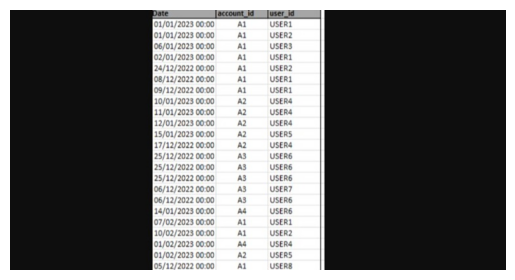

In [18]:
# URL da imagem
image_url3 = 'https://lh3.googleusercontent.com/d/1QvXZKd77X-gFTrgWEsDJppzWeiyZrbUL'

# Carregar a imagem da URL
response3= requests.get(image_url3)
image_bytes3 = BytesIO(response3.content)
image3 = cv2.imdecode(np.frombuffer(image_bytes3.read(), np.uint8), cv2.IMREAD_COLOR)

# Converter de BGR (OpenCV) para RGB (Matplotlib)
image_rgb3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem
resized_image3 = resize_image(image_rgb3, scale_factor=2)

# Exibir a imagem redimensionada
plt.imshow(resized_image3)
plt.axis('off')
plt.show()

In [19]:
# Dados coletados da imagem
custom_config3 = r'--oem 1 --psm 6'
text3 = pytesseract.image_to_string(resized_image3, config=custom_config3)
print(text3)

Pate  _—s_—ijaccountid userid _—
01/01/2023 00:00 Al USER1
01/01/2023 00:00 Al USER2
06/01/2023 00:00 Al USER3
02/01/2023 00:00 Al USER1
24/12/2022 00:00 Al USER2
08/12/2022 00:00 Al USER1
09/12/2022 00:00 Al USER1
10/01/2023 00:00 A2 USERS
11/01/2023 00:00 A2 USERS
12/01/2023 00:00 A2 USERS
15/01/2023 00:00 A2 USERS
17/12/2022 00:00 A2 USERS
25/12/2022 00:00 AS USER6
25/12/2022 00:00 A3 USER6
25/12/2022 00:00 A3 USER6
06/12/2022 00:00 A3 USER7
06/12/2022 00:00 A3 USER6
14/01/2023 00:00 AS USER6
07/02/2023 00:00 Al USER1
10/02/2023 00:00 Al USER2
01/02/2023 00:00 AS USERS
01/02/2023 00:00 A2 USERS
05/12/2022 00:00 Al USERS



In [20]:
# Usar StringIO para converter o texto limpo em um DataFrame
data3 = StringIO(text3)
df3 = pd.read_csv(data3, engine='python')

# Seleciona a primeira coluna, divide em várias colunas e trata valores nulos
df3 = df3.iloc[:, 0].astype(str).str.split(' ', expand=True)

# Nova coluna é a união da 1ª e 2ª coluna do dataframe com um espaço como separador
df3['1'] = df3.iloc[:, :2].agg(' '.join, axis=1)

# Deletar as duas primeiras colunas, que foram base da união
df3 = df3.drop(df3.columns[:2], axis=1)

# Correção do cabeçalho
df3.columns = ['account_id', 'user_id', 'Date']

# Reordenar as colunas
df3 = df3[['Date', 'account_id', 'user_id']]

# Corrigir inconsistências comuns
df3['account_id'] = df3['account_id'].str.strip().replace({'Al': 'A1', 'AS': 'A4'})

# Deletar a coluna user_id, pois tem inconsistências e ela não será utilizada para responder a pergunta
df3 = df3.drop('user_id', axis=1)

# Dataframe final
df3

,Date,account_id
0,01/01/2023 00:00,A1
1,01/01/2023 00:00,A1
2,06/01/2023 00:00,A1
3,02/01/2023 00:00,A1
4,24/12/2022 00:00,A1
5,08/12/2022 00:00,A1
6,09/12/2022 00:00,A1
7,10/01/2023 00:00,A2
8,11/01/2023 00:00,A2
9,12/01/2023 00:00,A2


In [21]:
# Ajusta coluna Date
df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y %H:%M')

# Filtrar os dados para dezembro de 2022 e janeiro de 2023
dezembro_2022 = df3[(df3['Date'].dt.month == 12) & (df3['Date'].dt.year == 2022)]
janeiro_2023 = df3[(df3['Date'].dt.month == 1) & (df3['Date'].dt.year == 2023)]

# Obter os `account_id` únicos em dezembro de 2022 e janeiro de 2023
accounts_dezembro_2022 = set(dezembro_2022['account_id'])
accounts_janeiro_2023 = set(janeiro_2023['account_id'])

# Identificar quais account_id estavam presentes em dezembro de 2022 e se continuaram em janeiro de 2023
# Calcular retenção para cada `account_id`
retencao = {}
for account in accounts_dezembro_2022:
    retido = 1 if account in accounts_janeiro_2023 else 0
    retencao[account] = retido

# Para ver qual `account_id` teve a maior taxa de retenção
maior_retencao = max(retencao, key=retencao.get)
print(f"\n São estes os Account_id que tiveram a maior taxa de retenção: {maior_retencao}")


 São estes os Account_id que tiveram a maior taxa de retenção: A4


#<font color= yellow> **Pergunta 4:** Desenvolva um script SQL para calcular a receita acumulada para os meses disponíveis em 2023, de acordo com a tabela da imagem 4.

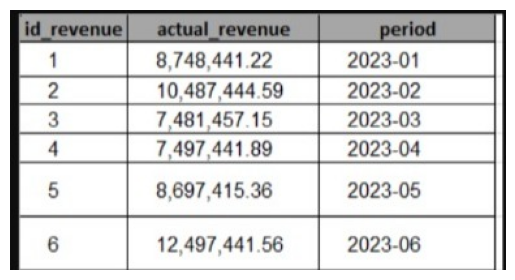

In [22]:
# URL da imagem
image_url4 = 'https://lh3.googleusercontent.com/d/1sLiMsYpwbWLdGAi7qpP1GwoCz8mRg3Y_'

# Carregar a imagem da URL
response4 = requests.get(image_url4)
image_bytes4 = BytesIO(response4.content)
image4 = cv2.imdecode(np.frombuffer(image_bytes4.read(), np.uint8), cv2.IMREAD_COLOR)

# Converter de BGR (OpenCV) para RGB (Matplotlib)
image_rgb4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem
resized_image4 = resize_image(image_rgb4, scale_factor=1)

# Exibir a imagem redimensionada
plt.imshow(resized_image4)
plt.axis('off')
plt.show()

In [23]:
# Dados coletados da imagem
custom_config4 = r'--oem 3 --psm 6'
text4 = pytesseract.image_to_string(resized_image4, config=custom_config4)
print(text4)

| 1 | _8,748,441.22 2023-01
} 2 | 10,487,444.59 2023-02
P 3 | 7,481,457.15 2023-03
| 4 | 7,497,441.89 2023-04
Ps | 8,697,415.36 2023-05
ls | 12,497,441.56 2023-06



In [24]:
# Limpeza do texto
cleaned_text4 = text4.replace("| ", "").replace("} ", "").replace("P ", "").replace("_", "").replace("Ps ", "5 ").replace("ls ", "6 ").strip()

# Usar StringIO para converter o texto limpo em um DataFrame
data4 = StringIO(cleaned_text4)
df4 = pd.read_csv(data4, delim_whitespace=True, header=None, names=['id_revenue', 'actual_revenue', 'period'])

# Ajustar o tipo das colunas numericas
df4['actual_revenue'] = df4['actual_revenue'].str.replace(",", "").astype(float)

# Dataframe final
df4

,id_revenue,actual_revenue,period
0,1,8748441.22,2023-01
1,2,10487444.59,2023-02
2,3,7481457.15,2023-03
3,4,7497441.89,2023-04
4,5,8697415.36,2023-05
5,6,12497441.56,2023-06


In [25]:
# Conectar ao banco de dados SQLite em memória
conexao4 = sqlite3.connect(':memory:')

# Carregar o DataFrame para uma tabela SQLite
df4.to_sql('revenue', conexao4, index=False, if_exists='replace')

# Consultar o DataFrame usando SQL
query4 = '''
    SELECT actual_revenue,
           SUM(actual_revenue) OVER (ORDER BY period DESC) AS cumulative_revenue,
           period
    FROM revenue
'''

# Executar a consulta SQL e armazenar o resultado em um DataFrame
resultado4 = pd.read_sql_query(query4, conexao4)

# Fechar a conexão com o banco de dados
conexao4.close()

# Mostrar o resultado
print("A receita acumulada para os meses disponíveis em 2023, pode ser conferida abaixo: \n")
print(resultado4)

A receita acumulada para os meses disponíveis em 2023, pode ser conferida abaixo: 

   actual_revenue  cumulative_revenue   period
0     12497441.56         12497441.56  2023-06
1      8697415.36         21194856.92  2023-05
2      7497441.89         28692298.81  2023-04
3      7481457.15         36173755.96  2023-03
4     10487444.59         46661200.55  2023-02
5      8748441.22         55409641.77  2023-01


#<font color= yellow> **Pergunta 5:** Desenvolva um script SQL para encontrar o consultor que realizou vendas com os valores máximos durante os anos 2021, 2022, 2023, baseado-se nos dados da tabela da imagem 5.

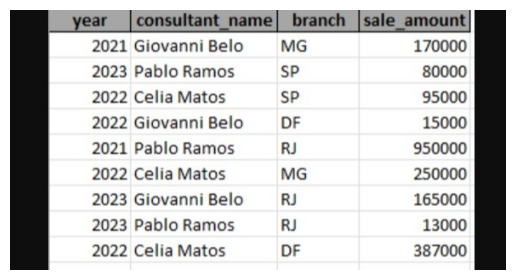

In [26]:
# URL da imagem
image_url5 = 'https://lh3.googleusercontent.com/d/1QZqIIJMVwPnXs6wkotYX9OPm5YqvfNQG'

# Carregar a imagem da URL
response5 = requests.get(image_url5)
image_bytes5 = BytesIO(response5.content)
image5 = cv2.imdecode(np.frombuffer(image_bytes5.read(), np.uint8), cv2.IMREAD_COLOR)

# Converter de BGR (OpenCV) para RGB (Matplotlib)
image_rgb5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem
resized_image5 = resize_image(image_rgb5, scale_factor=1)

# Exibir a imagem redimensionada
plt.imshow(resized_image5)
plt.axis('off')
plt.show()

In [27]:
# Dados coletados da imagem
custom_config5 = r'--oem 3 --psm 6'
text5 = pytesseract.image_to_string(resized_image5, config=custom_config5)
print(text5)

year __|consultant_name| branch |sale_amount
2021 Giovanni Belo MG 170000
2023 Pablo Ramos sp 80000
2022 Celia Matos sp 95000
2022 Giovanni Belo DF 15000
2021 Pablo Ramos RJ 950000
2022 Celia Matos MG 250000
2023 Giovanni Belo RJ 165000
2023 Pablo Ramos RJ 13000
2022 Celia Matos OF 387000



In [28]:
# Limpeza do texto
cleaned_text5 = text5.replace("__|", "").replace("|", "").strip()

# Usar StringIO para converter o texto limpo em um DataFrame
data5 = StringIO(cleaned_text5)
df5 = pd.read_csv(data5, sep=' ', engine='python')

# Nova coluna é a união da 1ª e 2ª coluna do dataframe com um espaço como separador
df5['combinada'] = df5.iloc[:, :2].agg(' '.join, axis=1)

# Deletar as colunas que foram base da união
df5 = df5.drop(df5.columns[:2], axis=1)

# Reseta o índice
df5 = df5.reset_index(drop=False)

# Correção do cabeçalho
df5.columns = ['year', 'branch', 'sale_amount', 'consultant_name']

# Reordenar as colunas
df5 = df5[['year', 'consultant_name', 'branch', 'sale_amount']]

# Corrigir inconsistências comuns
df5['branch'] = df5['branch'].str.strip().replace({'sp': 'SP', 'OF': 'DF'})

# Dataframe final
df5

,year,consultant_name,branch,sale_amount
0,2021,Giovanni Belo,MG,170000
1,2023,Pablo Ramos,SP,80000
2,2022,Celia Matos,SP,95000
3,2022,Giovanni Belo,DF,15000
4,2021,Pablo Ramos,RJ,950000
5,2022,Celia Matos,MG,250000
6,2023,Giovanni Belo,RJ,165000
7,2023,Pablo Ramos,RJ,13000
8,2022,Celia Matos,DF,387000


In [29]:
# Conectar ao banco de dados SQLite em memória
conexao5 = sqlite3.connect(':memory:')

# Carregar o DataFrame para uma tabela SQLite
df5.to_sql('yearly_sales', conexao5, index=False, if_exists='replace')

# Consultar o DataFrame usando SQL
query5 = '''
    WITH CTE AS(
      SELECT year,
             consultant_name,
             sale_amount,
             branch,
             ROW_NUMBER() OVER (PARTITION BY year ORDER BY sale_amount DESC) as row_number
      FROM yearly_sales
    )
    SELECT year,
           consultant_name
    FROM CTE
    WHERE row_number = 1;
'''

# Executar a consulta SQL e armazenar o resultado em um DataFrame
resultado5 = pd.read_sql_query(query5, conexao5)

# Fechar a conexão com o banco de dados
conexao5.close()

# Mostrar o resultado
print("Os consultores que realizaram vendas com os valores máximos durante os anos 2021, 2022, 2023 são: \n")
print(resultado5)

Os consultores que realizaram vendas com os valores máximos durante os anos 2021, 2022, 2023 são: 

   year consultant_name
0  2021     Pablo Ramos
1  2022     Celia Matos
2  2023   Giovanni Belo


#<font color= yellow> **Pergunta 6:** Desenvolva um script SQL para classificar os funcionários com base nos seus salários, mas agrupados por departamento. Além disso, deve ser exibido o número total de funcionários em cada departamento e o salário médio dentro de cada departamento. Para isso, utilize como base os dados da tabela da imagem 6 (PDF).

In [107]:
import pdfplumber
import gdown

url6 = f'https://drive.google.com/uc?id=1cZc4FoSq-7JY9auPZJ_Na127viUdZ9k0'
output6 = 'arquivo.pdf'

gdown.download(url6, output6, quiet=False)

# Abrir o arquivo PDF e extrair o texto
with pdfplumber.open(output6) as pdf:
    # Supondo que a tabela esteja na primeira página
    page = pdf.pages[0]
    # Extrair a tabela
    table = page.extract_table()

# Criar um DataFrame com a tabela extraída
df6 = pd.DataFrame(table[1:], columns=table[0])

df6

Downloading...
From: https://drive.google.com/uc?id=1cZc4FoSq-7JY9auPZJ_Na127viUdZ9k0
To: /content/arquivo.pdf
100%|██████████| 413k/413k [00:00<00:00, 17.6MB/s]


,Worker_id,name,last_name,salary,departament
0,1,Rener,Escobar,26300,TI
1,2,Marcio,Gather,3500,RH
2,3,Luana,Sier,12000,Financeiro
3,4,Fernanda,Luna,5000,Financeiro
4,5,Cris(cid:415)ne,Paiva,8800,Marke(cid:415)ng
5,6,Rafael,Costa,16000,TI
6,7,Pable,Henrique,9300,Administrador
7,8,José,Maria,7860,RH
8,9,Ronalda,Ba(cid:415)sta,15000,Marke(cid:415)ng
9,10,Tihago,Silva,7500,TI


In [114]:
# Corrigir inconsistências comuns
df6 = df6.replace({r'\(cid:415\)': 'ti'}, regex=True)

# Converter a coluna salary para inteiro
df6['salary'] = df6['salary'].astype(int)

# Dataframe final
df6

,Worker_id,name,last_name,salary,departament
0,1,Rener,Escobar,26300,TI
1,2,Marcio,Gather,3500,RH
2,3,Luana,Sier,12000,Financeiro
3,4,Fernanda,Luna,5000,Financeiro
4,5,Cristine,Paiva,8800,Marketing
5,6,Rafael,Costa,16000,TI
6,7,Pable,Henrique,9300,Administrador
7,8,José,Maria,7860,RH
8,9,Ronalda,Batista,15000,Marketing
9,10,Tihago,Silva,7500,TI


In [116]:
# Conectar ao banco de dados SQLite em memória
conexao6 = sqlite3.connect(':memory:')

# Carregar o DataFrame para uma tabela SQLite
df6.to_sql('employee', conexao6, index=False, if_exists='replace')

# Consultar o DataFrame usando SQL
query6 = '''
    SELECT departament,
       name,
       last_name,
       salary,
       RANK() OVER (PARTITION BY departament ORDER BY salary DESC) AS ranking,
       COUNT(*) OVER (PARTITION BY departament) AS total_funcionarios,
       AVG(salary) OVER (PARTITION BY departament) AS salario_medio
    FROM employee
'''

# Executar a consulta SQL e armazenar o resultado em um DataFrame
resultado6 = pd.read_sql_query(query6, conexao6)

# Fechar a conexão com o banco de dados
conexao6.close()

# Mostrar o resultado
print("Os funcionários classificados por salário e agrupados por departamento. Acompanhado do total de funcionários e o salário médio em cada departamento é: \n")
print(resultado6)

Os funcionários classificados por salário e agrupados por departamento. Acompanhado do total de funcionários e o salário médio em cada departamento é: 

     departament      name last_name  salary  ranking  total_funcionarios  \
0  Administrador     Pable  Henrique    9300        1                   1   
1     Financeiro     Luana      Sier   12000        1                   2   
2     Financeiro  Fernanda      Luna    5000        2                   2   
3      Marketing   Ronalda   Batista   15000        1                   2   
4      Marketing  Cristine     Paiva    8800        2                   2   
5             RH      José     Maria    7860        1                   2   
6             RH    Marcio    Gather    3500        2                   2   
7             TI     Rener   Escobar   26300        1                   3   
8             TI    Rafael     Costa   16000        2                   3   
9             TI    Tihago     Silva    7500        3                   3   
